<a href="https://colab.research.google.com/github/stephenchen0814/04-LinearReg_Salary/blob/main/Perceptron_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [60]:
dataset = pd.read_csv('Ionosphere.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [61]:
X1=X[:100, [0,2]]
y1=y[:100]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20)
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

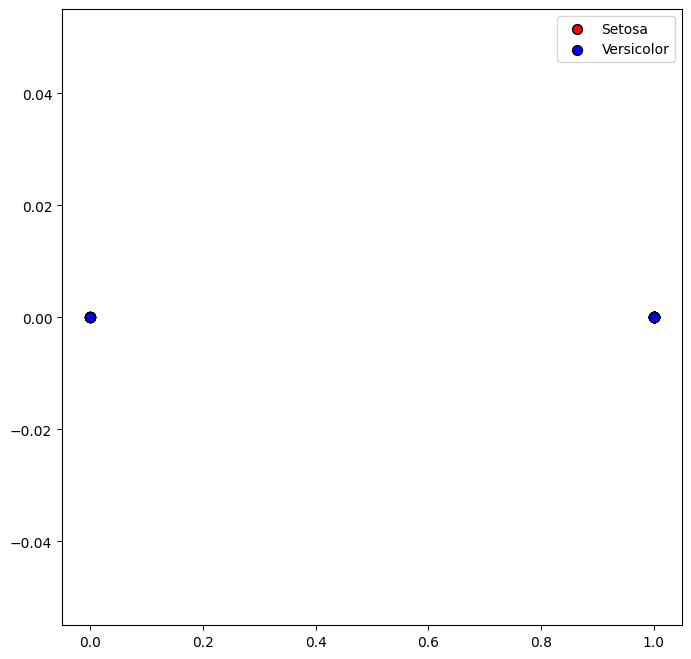

In [63]:
fig=plt.figure(figsize=(8,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', s=50, label='Setosa',edgecolors='k')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', s=50, label='Versicolor',edgecolors='k')
plt.legend()
plt.show()

In [64]:
class Adaline:
    def __init__(self, lr=0.01, n_epoch=150):
        self.lr=lr
        self.n_epoch=n_epoch
        self.weight=None
        self.bias=None

    def __func__(self, X):
        return np.dot(X, self.weight)+self.bias

    def fit(self, X, y):
        self.weight=np.zeros(X.shape[1])
        self.bias=0.

        for _ in range(self.n_epoch):
            output=self.__func__(X)
            error = output-y
            dw=2*np.dot(error,X)/X.shape[0]
            db=2*error.mean()

            self.weight=self.weight-self.lr*dw
            self.bias-=self.lr*db

    def predict(self, X):
        return np.where(self.__func__(X)>=0.5, 1,0)

In [65]:
ada=Adaline(n_epoch=300)
ada.fit(X_train, y_train)
confusion_matrix(y_test, ada.predict(X_test))

array([[ 6,  3],
       [ 0, 11]])

In [66]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(X, y, model, resolution=0.02):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    markers = ('s', 'x', 'o', '^', 'v')

    # Set min and max values and give it some padding
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl, 0], X[y==cl, 1],  color=cmap(idx),edgecolors='k',marker=markers[idx],label=cl)

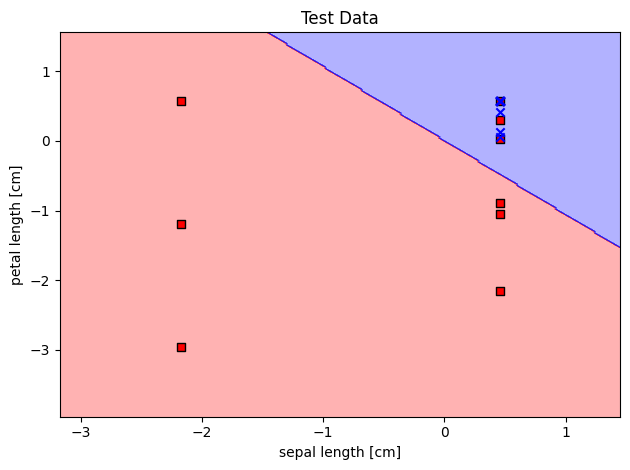

In [67]:
plot_decision_boundary(X_test, y_test, ada)
plt.title("Test Data")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.tight_layout()
plt.show()

In [68]:
X2=X[:100, :]
y2=y[:100]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20)
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ada_full=Adaline()
ada_full.fit(X_train, y_train)
confusion_matrix(y_test, ada_full.predict(X_test))

array([[ 4,  3],
       [ 1, 12]])